# Лабораторная работа 

# №9. Дифференцирование и интегрирование

## Писарик Максим, 5130901/10101

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import TriangleSignal
from thinkdsp import SquareSignal
from thinkdsp import SawtoothSignal
from thinkdsp import CubicSignal
from thinkdsp import zero_pad
from thinkdsp import Wave

PI2 = np.pi * 2

## УПРАЖНЕНИЕ 9.2

В этом упражнении изучается влияние diff и differentiate на сигнал. Необходимо создать треугольный сигнал, применить к нему diff и напечатать результат; вычислить спектр сигнала, применить differentiate и напечатать результат; преобразовать спектр обратно в сигнал и напечатать его. Определить, есть ли различия в воздействии diff и differentiate на сигнал.

Создадим треугольный сигнал:

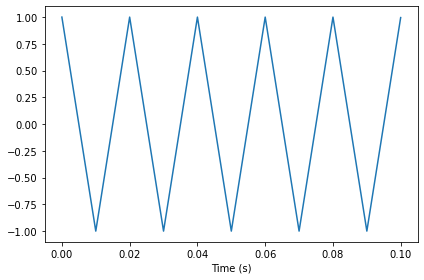

In [7]:
wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

Применим diff:

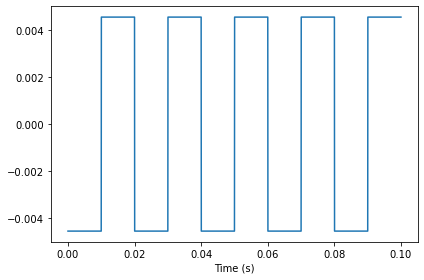

In [8]:
wave1 = wave.diff()
wave1.plot()
decorate(xlabel='Time (s)')

Видим, что diff треугольного сигнала - прямоугольный сигнал. 

Теперь вычислим спектр сигнала, применим differentiate и напечатаем результат.

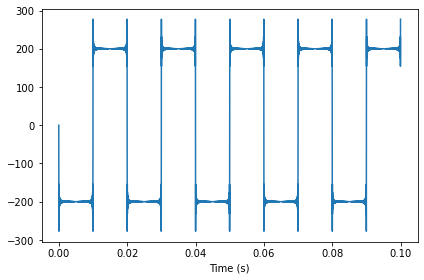

In [9]:
wave2 = wave.make_spectrum().differentiate().make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Полученный эффект возник, т.к. производная треугольного сигнала не определена в точках треугольника.

## УПРАЖНЕНИЕ 9.3

В этом упражнении изучается влияние cumsum и integrate на сигнал. Необходимо создать прямоугольный сигнал, применить к нему cumsum и напечатать результат; вычислить спектр сигнала, применить integrate и напечатать результат; преобразовать спектр обратно в сигнал и напечатать его. Определить, есть ли различия в воздействии cumsum и integrate на сигнал.

Создадим прямоугольный сигнал.

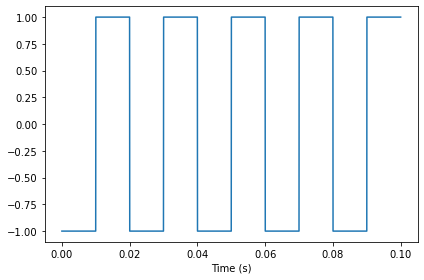

In [10]:
wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

Применим cumsum:

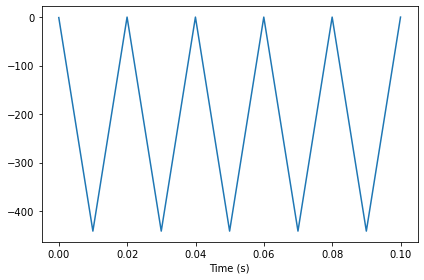

In [11]:
wave1 = wave.cumsum()
wave1.plot()
decorate(xlabel='Time (s)')

Видим, что нарастающая сумма для прямоугольного сигнала - треугольный сигнал. 

Теперь вычислим спектр сигнала, применим integrate и напечатаем результат.

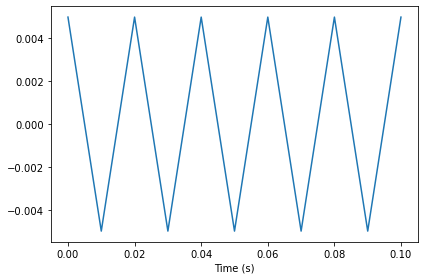

In [12]:
spectrum = wave.make_spectrum().integrate()
spectrum.hs[0] = 0
wave2 = spectrum.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Видим, что спектральный интеграл также представляет собой треугольный сигнал, хотя амплитуда сильно отличается.

Чтобы сделать сигналы более схожими, можем применить unbias() и normalize():

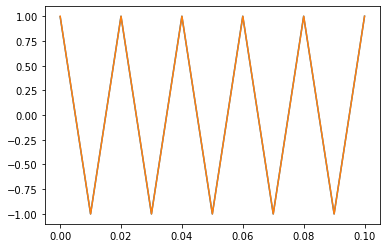

In [13]:
wave1.unbias()
wave1.normalize()
wave2.normalize()
wave1.plot()
wave2.plot()

Сравним сигналы:

In [14]:
wave1.max_diff(wave2)

0.0045351473922902175

Сигналы схожи.

## УПРАЖНЕНИЕ 9.4

В данном упражнении изучается влияние двойного интегрирования. Необходимо создать пилообразный сигнал, вычислить его спектр и дважды применить integrate. Напечатать результирующий сигнал и его спектр.

Создадим пилообразный сигнал:

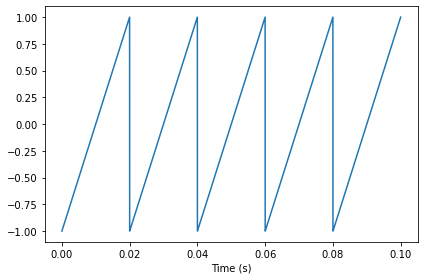

In [16]:
wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time (s)')

Построим спектр сигнала:

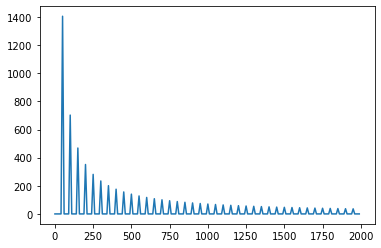

In [20]:
spectrum = wave.make_spectrum()
spectrum.plot(high=2000)

Дважды применим integrate:

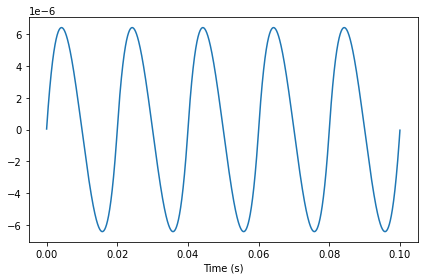

In [22]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
wave2 = spectrum.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Результат напоминает синусоиду, т.к. интегрирование действует как фильтр НЧ. 

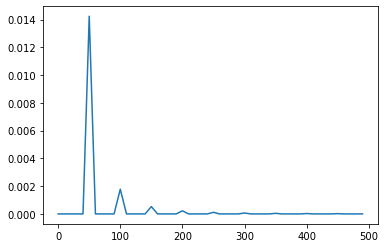

In [23]:
wave2.make_spectrum().plot(high=500)

На графике видно, что были отфильтрованы почти все частоты, кроме основной.

## УПРАЖНЕНИЕ 9.5

В данном упражнении изучается влияние второй разности и второй производной. Необходимо создать CubicSignal, вычислить вторую разность (дважды применив diff), вычислить вторую производную (дважды применив differentiate к спектру). Определить, похожи ли реультаты.

Также необходимо распечатать фильтры, соответствующие второй разнице и второй производной, сравнить их.

Создадим CubicSignal:

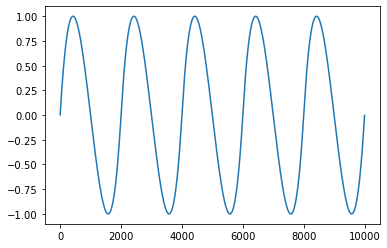

In [34]:
wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
wave.plot()

Первое применение diff:

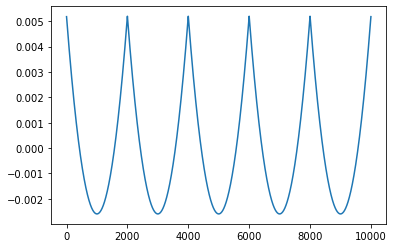

In [35]:
wave1 = wave.diff()
wave1.plot()

Получили параболу.

Второе применение diff:

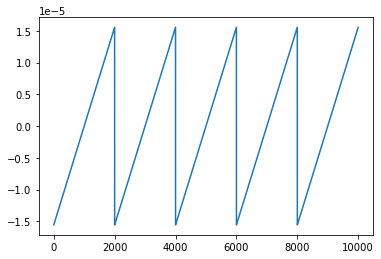

In [36]:
wave1 = wave1.diff()
wave1.plot()

Получили пилообразный сигнал.

Далее вычислим спектр сигнала и дважды применим differentiate:

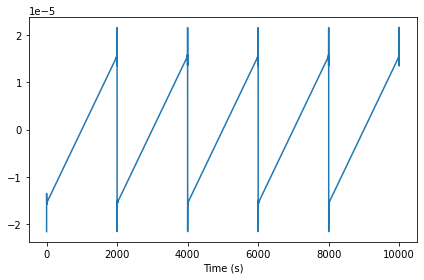

In [37]:
spectrum = wave.make_spectrum().differentiate().differentiate()
wave2 = spectrum.make_wave()
wave2.plot()
decorate(xlabel='Time (s)')

Полученный эффект на графике возник, т.к. производная параболического сигнала в точках не определена.

Чтобы найти фильтр второй разницы, необходимо вычислить ДПФ окна -1, 2, -1.

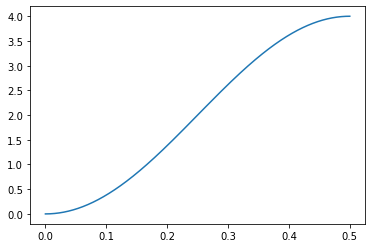

In [39]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

Чтобы найти фильтр второй производной, необходимо вычислить фильтр первой производной и возвести его в квадрат.

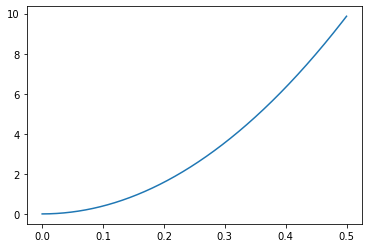

In [41]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

Данные фильтры - фильтры ВЧ. Они усиливают компоненты самых высоких частот. Вторая разница - хорошее приближение второй производной только на самых низких частотах, затем она существенно отклоняется.